Covid 19 Data Analysis
How Concerned Are Americans About the Coronavirus?
This is my first project based on data downloaded from https://data.fivethirtyeight.com/ or https://github.com/fivethirtyeight/covid-19-polls
on the night of 20 December 2020 - two days after it was uploaded on the web
While the above is the overall topic of this analysis, it is broken into 2 parts:
a) Where or not Americans approve the way Trump is handling covid 19; and
b) how concerned they feel about aspects of the outbreak such as infection and economic impact.
To avoid confusion, this file will handle (a) part while (b) part will be handled in the next file.

In [14]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Questions (tasks) (will add more as I develop):
o What are the parties of the respondents?
o Does their party affiliation affect their response?
o Is there any trend?
o Analyse the approval and disapproval responses in total and in relation to different criteria eg party, pollster and sponsor
o Visualise as much as possible


In [15]:
#After downloarding the data, this is to read it into a data from which I call covdf
covidf=pd.read_csv('covid_approval_polls.csv')
#The file read here contains polls that ask Americans whether or not they approve of the way Trump is handling covid-19.

In [17]:
covidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 13 columns):
start_date     2137 non-null object
end_date       2137 non-null object
pollster       2137 non-null object
sponsor        1039 non-null object
sample_size    2124 non-null float64
population     2137 non-null object
party          2137 non-null object
subject        2137 non-null object
tracking       2130 non-null object
text           2136 non-null object
approve        2134 non-null float64
disapprove     2122 non-null float64
url            2137 non-null object
dtypes: float64(3), object(10)
memory usage: 217.1+ KB


In [16]:
#Reading the first 3 records
covidf.head(3)

,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,approve,disapprove,url
0,2020-02-02,2020-02-04,YouGov,Economist,1500.0,a,all,Trump,False,Do you approve or disapprove of Donald Trump’s...,42.0,29.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
1,2020-02-02,2020-02-04,YouGov,Economist,376.0,a,R,Trump,False,Do you approve or disapprove of Donald Trump’s...,75.0,6.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
2,2020-02-02,2020-02-04,YouGov,Economist,523.0,a,D,Trump,False,Do you approve or disapprove of Donald Trump’s...,21.0,51.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...


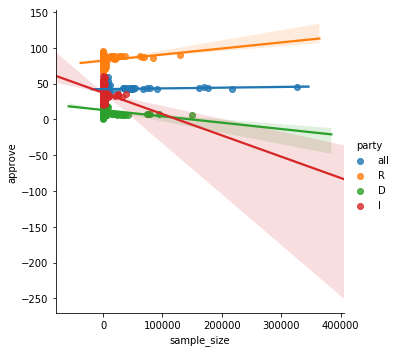

In [31]:
#Trying to determine the relationship between approval and sample size with regards to each party
sns.lmplot('sample_size','approve',covidf, hue='party')

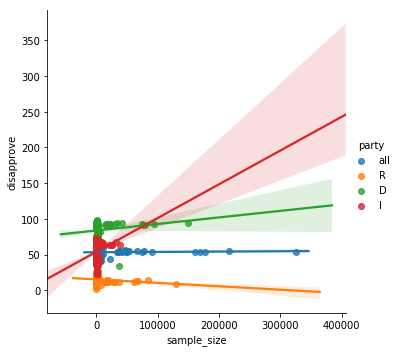

In [34]:
#Trying to determine the relationship between disapproval and sample size with regards to each party
sns.lmplot('sample_size','disapprove',covidf, hue='party')

In [19]:
#Aha, the subject attribute (column) marks whose handling of covid-19 the approval poll is about.  In this case it is Trump.  Therefore every row on this column carries the same value.

In [20]:
covidf.groupby('population').count()

,start_date,end_date,pollster,sponsor,sample_size,party,subject,tracking,text,approve,disapprove,url
population,,,,,,,,,,,,
a,1339,1339,1339,667,1338,1339,1339,1338,1339,1339,1324,1339
lv,96,96,96,40,93,96,96,96,95,96,96,96
rv,702,702,702,332,693,702,702,696,702,699,702,702


Population: 1 = adults; lv = likely voters; rv = registered voters

In [27]:
covidf.groupby('sponsor').count().head()

,start_date,end_date,pollster,sample_size,population,party,subject,tracking,text,approve,disapprove,url
sponsor,,,,,,,,,,,,
314 Action,1,1,1,1,1,1,1,1,1,1,1,1
ABC,1,1,1,1,1,1,1,1,1,1,1,1
ABC News,57,57,57,57,57,57,57,57,57,57,57,57
Accountable.US,1,1,1,1,1,1,1,1,1,1,1,1
American Enterprise Institute,2,2,2,2,2,2,2,2,2,2,2,2


In [26]:
covidf.groupby('pollster').count().head()

,start_date,end_date,sponsor,sample_size,population,party,subject,tracking,text,approve,disapprove,url
pollster,,,,,,,,,,,,
ABC,21,21,4,21,21,21,21,21,21,21,21,21
AP-NORC,23,23,0,23,23,23,23,23,23,23,17,23
American Research Group,37,37,0,37,37,37,37,37,37,37,37,37
AtlasIntel,1,1,0,1,1,1,1,1,1,1,1,1
Benenson,1,1,0,1,1,1,1,1,1,1,1,1


In [23]:
covidf.groupby('party').count()

,start_date,end_date,pollster,sponsor,sample_size,population,subject,tracking,text,approve,disapprove,url
party,,,,,,,,,,,,
D,505,505,505,240,501,505,505,503,505,504,499,505
I,475,475,475,233,470,475,475,475,475,474,472,475
R,505,505,505,240,501,505,505,503,505,504,499,505
all,652,652,652,326,652,652,652,649,651,652,652,652


In [37]:
p=covidf.groupby('party').count()

In [38]:
p

,start_date,end_date,pollster,sponsor,sample_size,population,subject,tracking,text,approve,disapprove,url
party,,,,,,,,,,,,
D,505,505,505,240,501,505,505,503,505,504,499,505
I,475,475,475,233,470,475,475,475,475,474,472,475
R,505,505,505,240,501,505,505,503,505,504,499,505
all,652,652,652,326,652,652,652,649,651,652,652,652


In [42]:
p.start_date

party
D      505
I      475
R      505
all    652
Name: start_date, dtype: int64

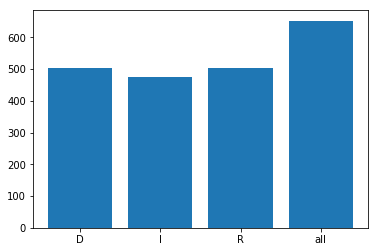

In [52]:
#Number who approved the handling of Covid 19 by Donald Trump
#as per party affiliation
party=['D','I','R','all']
plt.bar(party,p.approve)
plt.show()

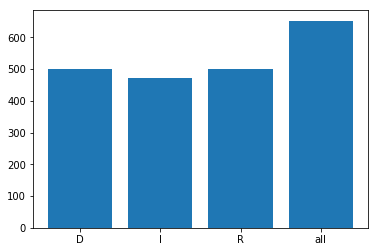

In [53]:
#Number who disapproved the handling of Covid 19 by Donald Trump
#as per party affiliation
party=['D','I','R','all']
plt.bar(party,p.disapprove)
plt.show()

25 Dec 2020 To be continued ...

In [54]:
pwd

'C:\\Users\\abelu\\OneDrive\\Desktop\\Abel\\Python'